<a href="https://colab.research.google.com/github/mayank-pq2q4/Prototype-S.I.H/blob/master/pothole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

drive  sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12467 (delta 8), reused 12 (delta 6), pack-reused 12449
Receiving objects: 100% (12467/12467), 11.44 MiB | 6.42 MiB/s, done.
Resolving deltas: 100% (8503/8503), done.


In [0]:
cp drive/'My Drive'/data_for_colab.zip /content/darknet

In [4]:
cd darknet

/content/darknet


In [5]:
ls

3rdparty/     CMakeLists.txt          image_yolov3.sh*        scripts/
appveyor.yml  DarknetConfig.cmake.in  include/                src/
build/        darknet.py              json_mjpeg_streams.sh*  video_v2.sh*
build.ps1*    darknet_video.py        LICENSE                 video_yolov3.sh*
build.sh*     data/                   Makefile
cfg/          data_for_colab.zip      net_cam_v3.sh*
cmake/        image_yolov2.sh*        README.md


In [6]:
!unzip data_for_colab

Archive:  data_for_colab.zip
   creating: data_for_colab/data/
  inflating: data_for_colab/data/Pothole0 resized.jpg  
  inflating: data_for_colab/data/Pothole0 resized.txt  
  inflating: data_for_colab/data/Pothole1 resized.jpg  
  inflating: data_for_colab/data/Pothole1 resized.txt  
  inflating: data_for_colab/data/Pothole10 resized.jpg  
 extracting: data_for_colab/data/Pothole10 resized.txt  
  inflating: data_for_colab/data/Pothole100 resized.jpg  
  inflating: data_for_colab/data/Pothole100 resized.txt  
  inflating: data_for_colab/data/Pothole101 resized.jpg  
  inflating: data_for_colab/data/Pothole101 resized.txt  
  inflating: data_for_colab/data/Pothole102 resized.jpg  
  inflating: data_for_colab/data/Pothole102 resized.txt  
  inflating: data_for_colab/data/Pothole103 resized.jpg  
  inflating: data_for_colab/data/Pothole103 resized.txt  
  inflating: data_for_colab/data/Pothole104 resized.jpg  
  inflating: data_for_colab/data/Pothole104 resized.txt  
  inflating: data_f

In [7]:
#upload train test.txt files
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving test.txt to test.txt
Saving train.txt to train.txt
saved file test.txt
saved file train.txt


In [8]:
!apt-get update
!apt-get upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [83.1 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bi

In [9]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
libavcodec-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libswscale-dev set to manually installed.
The following package 

In [10]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [11]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [12]:
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [13]:
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 7 not upgraded.
Need to get 6,721 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.1 [49.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.1 [70.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 

In [14]:
ls

3rdparty/     CMakeLists.txt          image_yolov2.sh*        README.md
appveyor.yml  DarknetConfig.cmake.in  image_yolov3.sh*        scripts/
build/        darknet.py              include/                src/
build.ps1*    darknet_video.py        json_mjpeg_streams.sh*  test.txt
build.sh*     data/                   LICENSE                 train.txt
cfg/          data_for_colab/         Makefile                video_v2.sh*
cmake/        data_for_colab.zip      net_cam_v3.sh*          video_yolov3.sh*


In [15]:
#Now let's get some YOLOv3 weights from the official site
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

3rdparty      CMakeLists.txt	      image_yolov2.sh	     README.md
appveyor.yml  DarknetConfig.cmake.in  image_yolov3.sh	     scripts
build	      darknet.py	      include		     src
build.ps1     darknet_video.py	      json_mjpeg_streams.sh  test.txt
build.sh      data		      LICENSE		     train.txt
cfg	      data_for_colab	      Makefile		     video_v2.sh
cmake	      data_for_colab.zip      net_cam_v3.sh	     video_yolov3.sh
--2020-02-19 13:19:25--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  22.5MB/s    in 11s     

2020-02-19 13:19:36 (21.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [16]:
#No here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

3rdparty	DarknetConfig.cmake.in	include		       test.txt
appveyor.yml	darknet.py		json_mjpeg_streams.sh  train.txt
build		darknet_video.py	LICENSE		       video_v2.sh
build.ps1	data			Makefile	       video_yolov3.sh
build.sh	data_for_colab		net_cam_v3.sh	       yolov3.weights
cfg		data_for_colab.zip	README.md
cmake		image_yolov2.sh		scripts
CMakeLists.txt	image_yolov3.sh		src


In [17]:
!ls
%cd ../
!ls

3rdparty	DarknetConfig.cmake.in	include		       test.txt
appveyor.yml	darknet.py		json_mjpeg_streams.sh  train.txt
build		darknet_video.py	LICENSE		       video_v2.sh
build.ps1	data			Makefile	       video_yolov3.sh
build.sh	data_for_colab		net_cam_v3.sh	       yolov3.weights
cfg		data_for_colab.zip	README.md
cmake		image_yolov2.sh		scripts
CMakeLists.txt	image_yolov3.sh		src
/content
darknet  drive	sample_data


In [18]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 7 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base

In [19]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

7 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2020-02-19 13:22:12--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.189.146
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.189.146|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?e6utF483_LQFbL-2Oz48pvdV_vhq6-YYJyLJ86xqPl0kbxfY3pLJP-xUlDcgw4gULD_8RuffesS5fXOCcQLaC7aPfYBmSjHzcfV-Ma2BKrD6JTUZOQUv_Kw41ild_403hfKRTvFDlwp6fQBtyo9-MmEPcVkZSP9Pn5zaqEkRNzldXmsBoYiBLF3lV7iA__zp1vCMcg1vrwBbtzHfrgqmgvTtOg [following]
--2020-02-19 13:22:13--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?e6utF483_LQFbL-2Oz48pvd

In [23]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [24]:
ls

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb  drive/
darknet/                                               sample_data/


In [25]:
%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: At global scope:
./src/image_opencv.cpp:427:14: warning: ‘float get_pixel(image, int, int, int)’ defined but not used [-Wunused-function]
 static float get_pixel(image m, int x, int y, int c)
              ^
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unus

In [26]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty	darknet			include		       src
appveyor.yml	DarknetConfig.cmake.in	json_mjpeg_streams.sh  test.txt
backup		darknet.py		LICENSE		       train.txt
build		darknet_video.py	Makefile	       video_v2.sh
build.ps1	data			net_cam_v3.sh	       video_yolov3.sh
build.sh	data_for_colab		obj		       yolov3.weights
cfg		data_for_colab.zip	README.md
cmake		image_yolov2.sh		results
CMakeLists.txt	image_yolov3.sh		scripts
 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  6

In [0]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

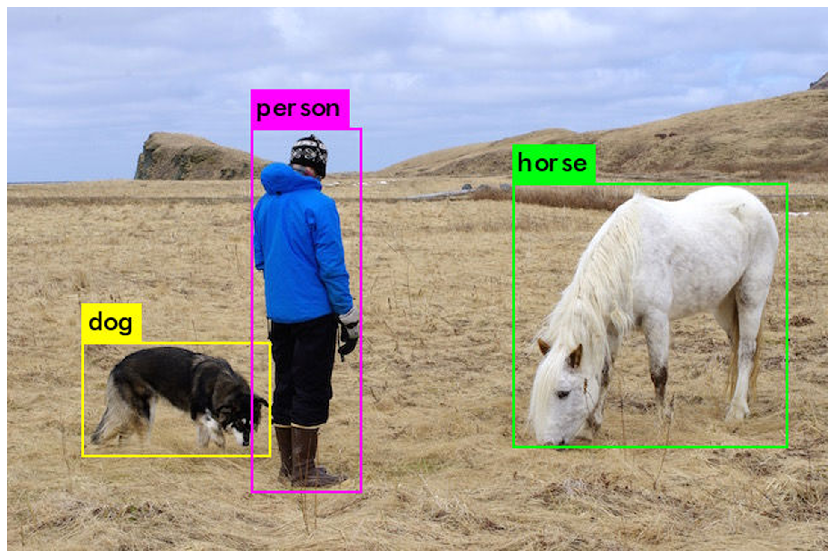

In [28]:
imShow('predictions.jpg')

In [29]:
ls

3rdparty/               darknet_video.py        predictions.jpg
appveyor.yml            data/                   README.md
backup/                 data_for_colab/         results/
build/                  data_for_colab.zip      scripts/
build.ps1*              image_yolov2.sh*        src/
build.sh*               image_yolov3.sh*        test.txt
cfg/                    include/                train.txt
cmake/                  json_mjpeg_streams.sh*  video_v2.sh*
CMakeLists.txt          LICENSE                 video_yolov3.sh*
darknet*                Makefile                yolov3.weights
DarknetConfig.cmake.in  net_cam_v3.sh*
darknet.py              obj/


In [30]:
!./darknet detector train data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg data_for_colab/yolov3-tiny.conv.15 -dont_show

Streaming output truncated to the last 5000 lines.
 1334: 1.210451, 1.535120 avg loss, 0.001000 rate, 4.855817 seconds, 85376 images
Loaded: 0.000063 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.521277, GIOU: 0.470416), Class: 0.997239, Obj: 0.482299, No Obj: 0.004586, .5R: 0.581699, .75R: 0.169935, count: 153, class_loss = 2.138783, iou_loss = 2.627380, total_loss = 4.766163 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: -nan, GIOU: -nan), Class: -nan, Obj: -nan, No Obj: 0.000005, .5R: -nan, .75R: -nan, count: 0, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.578520, GIOU: 0.554275), Class: 0.997978, Obj: 0.414898, No Obj: 0.004219, .5R: 0.666667, .75R: 0.184211, count: 114, class_loss = 2.056905, iou_loss = 2.009547, total_loss = 4.066452 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: -nan, GIOU: -nan), Class: -nan,

In [31]:
ls

3rdparty/                  DarknetConfig.cmake.in  net_cam_v3.sh*
appveyor.yml               darknet.py              obj/
backup/                    darknet_video.py        predictions.jpg
build/                     data/                   README.md
build.ps1*                 data_for_colab/         results/
build.sh*                  data_for_colab.zip      scripts/
cfg/                       image_yolov2.sh*        src/
chart.png                  image_yolov3.sh*        test.txt
chart_yolov3-tiny-obj.png  include/                train.txt
cmake/                     json_mjpeg_streams.sh*  video_v2.sh*
CMakeLists.txt             LICENSE                 video_yolov3.sh*
darknet*                   Makefile                yolov3.weights


In [41]:
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving lolol.jpg to lolol.jpg
saved file lolol.jpg


In [42]:
!./darknet detector test data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights lolol.jpg -i 0 -thresh 0.5

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
 

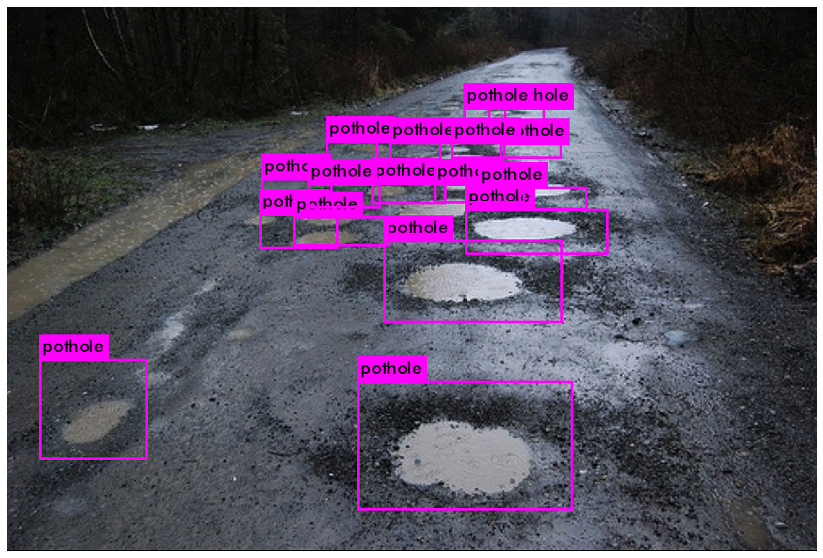

In [43]:
imShow('predictions.jpg')


In [0]:
cd ..

/content


In [0]:
cp drive/'My Drive'/Manhasameltdownoverridiculouspotholes.mp4 /content/darknet

In [0]:
cd darknet

/content/darknet


In [0]:
ls

 3rdparty/                   lol.jpg
 appveyor.yml                lolol.jpg
 backup/                     Makefile
 bad.list                    Manhasameltdownoverridiculouspotholes.mp4
 build/                      net_cam_v3.sh*
 build.ps1*                  nipotole.jpg
 build.sh*                   obj/
 cfg/                       'pothole (41).txt'
 chart.png                  'pothole (51).jpg'
 chart_yolov3-tiny-obj.png   pothole.jpg
 cmake/                      predictions.jpg
 CMakeLists.txt             'pthl (1).jpg'
 darknet*                    pthl1.jpg
 DarknetConfig.cmake.in      pthl.jpg
 darknet.py                  README.md
 darknet_video.py            results/
 data/                       scripts/
 data_for_colab/             src/
 data_for_colab.zip          test.jpg
 image_yolov2.sh*            test.txt
 image_yolov3.sh*            train.txt
 include/                    video_v2.sh*
 json_mjpeg_streams.sh*      video_yolov3.sh*
 LICENSE                     yolov3.weights

In [0]:
!./darknet detector demo data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights  -dont_show Manhasameltdownoverridiculouspotholes.mp4 -i 0 -out_filename veout.avi

Streaming output truncated to the last 5000 lines.
FPS:146.7 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:147.5 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:144.6 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:142.5 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:150.0 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:149.9 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:150.2 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:149.6 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:149.0 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:144.7 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:147.1 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:147.0 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:149.8 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:149.7 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:151.8 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:150.7 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:153.3 	 AVG_FPS:153.2

 cvWriteFrame 
Objects:


FPS:153.2 	 AVG_FPS:153.2

 cvWriteFrame 
Object

In [0]:
download('veout.avi') 

KeyboardInterrupt: ignored

In [0]:
!./darknet detector calc_anchors Dataset/obj.data -num_of_clusters 5 -width 416 -height 416

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0

 num_of_clusters = 5, width = 416, height = 416 
Couldn't open file: Dataset/obj.data
